## Introduction
Human Immunodeficiency Virus (HIV) remains one of the most pressing global health challenges. Despite major advances in prevention and treatment, adolescent girls and young women (AGYW) continue to bear a disproportionate burden of new infections, especially in sub-Saharan Africa. Research shows that adolescent girls and Young women are at least twice as likely to acquire HIV compared to their male counterparts due to a mix of biological, socio-economic, and behavioral risk factors.

The SPARK program (Strengthening Prevention and Awareness for Resilient Communities) was launched to reduce HIV infections among AGYW by addressing the structural drivers of HIV risk, including poverty, gender inequality, and violence. However, evaluating its effectiveness and identifying the most at-risk individuals remains a challenge.

This project leverages data science methodologies to analyze the effectiveness of SPARKS interventions, identify patterns of risk, and evaluate program outcomes. By utilizing data from program implementation, surveys, and HIV incidence tracking, the study aims to provide insights into optimizing resource allocation, improving service delivery, and strengthening impact assessment.

## Business Understanding
The core objective of this project is to support evidence-based decision-making in public health by analyzing SPARK'S program data. The business problem revolves around improving the targeting and effectiveness of interventions by identifying high-risk populations, measuring program reach, and assessing the correlation between intervention layering and HIV prevention outcomes.
This project leverages data science to support public health organizations, policymakers, NGOs, and the program's coordinators by providing data-driven insights to:
- Predict HIV risk among AGYW based on demographics, behavior, and intervention exposure.
- Identify key risk factors contributing to HIV vulnerability.
- Assess the effectiveness of the program's interventions in reducing HIV risk.
- Determine which interventions (biomedical, behavioral, social protection) have the most impact.

By answering these questions, we aim to improve resource allocation, intervention targeting, and HIV prevention strategies, ensuring that support reaches the most vulnerable AGYW effectively.

#### **Objectives:**

This project aims to:
- Develop a predictive model to estimate HIV risk among AGYW.
- Analyze key factors influencing HIV risk through feature importance techniques.
- Determine the most impactful interventions within the DREAMS framework.
- Provide actionable insights to optimize HIV prevention efforts.



## Data Understanding
**1. Dataset Description**

The dataset used in this project contains detailed demographic, behavioral, and intervention-related information on adolescent girls and young women (AGYW) participating in the health program. The data includes key indicators such as:

- Demographic Information – Age, county, household structure, parental status.
- Socioeconomic Status – Household size, food security, income sources.
- Education & Behavior – School attendance, history of sexual activity, condom use.
- HIV Testing & Status – HIV testing history, last test result.
- DREAMS Program Participation – Interventions received (biomedical, behavioral, social protection).
- Exit Status – Whether participants continued or exited the program and the reason for exiting.

This dataset provides a comprehensive view of factors affecting HIV risk among AGYW, allowing for predictive modeling and impact evaluation.

**2. Data Source**

The dataset originates from the SPARK(Strengthening Prevention and Awareness for Resilient Communities) initiative, a global HIV prevention effort targeting adolescent girls and young women.
 
*Why this dataset is relevant:*
- It includes key HIV risk indicators (e.g., sexual activity, education, income).
- It captures intervention history (biomedical, behavioral, social protection).
- It enables predictive modeling to identify at-risk individuals and evaluate intervention effectiveness.

*How we will use this data:*
- To identify patterns & risk factors that contribute to HIV vulnerability.
- To assess the program's interventions and their impact on HIV risk.
- To develop predictive models to help in resource allocation & targeted interventions.


## Data Cleaning

1. Loading Required Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv("Data/dreams_raw_dataset.csv")
data.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [3]:
data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

2. Checking Dataset Information & Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

In [5]:
data.shape

(455807, 42)

The data has 455807 rows and 42 columns

In [6]:
#Checking for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0] 


date_of_enrollment                        1
county                                 9256
head_of_household                      9615
head_of_household_other              449847
age_of_household_head                 21018
father_alive                          13408
mother_alive                          12987
parents_alive_status                  65404
no_of_people_in_household              7200
no_of_females                          7332
no_of_males                            7682
no_of_adults                           7479
no_of_children                         7773
ever_missed_full_day_food_in_4wks      7167
no_of_days_missed_food_in_4wks       199044
currently_in_school                    4173
current_school_level                 200866
current_income_source                129564
ever_had_sex                           7727
age_at_first_sexual_encounter        229551
has_sexual_partner                   229506
age_of_last_partner                  243275
used_condom_with_last_partner   

**Observations**

- Some columns have over 90% missing values, such as age_of_last_partner, used_condom_with_last_partner, and dreams_program_other.
- Important features like county (9,256 missing) and currently_in_school (4,173 missing) have moderate missingness.
- Household-related columns (head_of_household, no_of_people_in_household) also contain gaps.
- Columns related to sexual history (ever_had_sex, age_at_first_sexual_encounter) have high missing values, likely due to sensitive information.

In [7]:
num_cols = data.select_dtypes(include=np.number).columns
print(f'numerical columns: {num_cols}')
cat_cols = data.select_dtypes(include='object').columns
print(f'categorical columns:  {cat_cols}')

numerical columns: Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'age_at_first_sexual_encounter', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions', 'exit_age'],
      dtype='object')
categorical columns:  Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'dreams_program',
       'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'interve

In [16]:
columns_to_drop = list(set([
    'head_of_household_other', 'age_of_last_partner', 'dreams_program_other', 'exit_reason_other', 
    'date_of_enrollment', 'other_interventions', 'no_of_days_missed_food_in_4wks', 
    'ever_missed_full_day_food_in_4wks', 'dreams_program', 'pgv_care'
]))

# Drop unnecessary columns first
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' prevents errors if column not found

# Fill missing values
for col in data.columns:
    if col in num_cols:
        data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median
    elif col in cat_cols:
        most_frequent = data[col].mode()[0] if not data[col].mode().empty else "Unknown"
        data[col].fillna(most_frequent, inplace=True)  # Fill categorical with mode or "Unknown"


In [17]:
data.isnull().sum()

date_of_birth                    0
county                           0
head_of_household                0
age_of_household_head            0
father_alive                     0
mother_alive                     0
are_both_parents_alive           0
is_one_parent_alive              0
parents_alive_status             0
no_of_people_in_household        0
no_of_females                    0
no_of_males                      0
no_of_adults                     0
no_of_children                   0
currently_in_school              0
current_school_level             0
current_income_source            0
ever_tested_for_hiv              0
last_test_result                 0
ever_had_sex                     0
age_at_first_sexual_encounter    0
has_sexual_partner               0
used_condom_with_last_partner    0
exit_status                      0
exit_reason                      0
intervention_name                0
intervention_date                0
result                           0
bio_medical         

## Exploratory Data Analysis (EDA)
1. Summary Statistics

In [18]:
# Display summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
display(data.describe().T)

# Summary for categorical features
print("Summary of Categorical Features:")
display(data.describe(include='object').T)

Summary Statistics for Numerical Features:


,count,mean,min,25%,50%,75%,max,std
date_of_birth,455807,2001-03-11 06:09:37.428604416,1990-06-01 00:00:00,1998-07-01 00:00:00,2001-04-01 00:00:00,2003-11-29 12:00:00,2013-12-05 00:00:00,NaN
age_of_household_head,455807.0,1980.867203,-48.0,34.0,42.0,50.0,727284575.0,1080942.982843
no_of_people_in_household,455807.0,5.778117,0.0,4.0,6.0,7.0,356.0,3.806897
no_of_females,455807.0,3.325655,0.0,2.0,3.0,4.0,216.0,2.393859
no_of_males,455807.0,2.436187,0.0,1.0,2.0,3.0,140.0,1.896327
no_of_adults,455807.0,2.484201,0.0,2.0,2.0,3.0,77.0,1.286409
no_of_children,455807.0,3.278287,0.0,2.0,3.0,4.0,328.0,3.403991
age_at_first_sexual_encounter,455807.0,16.891472,0.0,17.0,17.0,17.0,4118.0,14.78979
intervention_date,455807,2020-09-09 08:22:02.391275520,2011-10-21 00:00:00,2019-06-12 00:00:00,2020-11-25 00:00:00,2021-12-19 00:00:00,2023-12-14 00:00:00,NaN
bio_medical,455807.0,0.990619,0.0,1.0,1.0,1.0,1.0,0.096401


Summary of Categorical Features:


,count,unique,top,freq
county,455807,7,Nairobi,109667
head_of_household,455807,9,Father,173119
father_alive,455807,4,Yes,295841
mother_alive,455807,4,Yes,378897
are_both_parents_alive,455807,2,Yes,273198
is_one_parent_alive,455807,2,No,338602
parents_alive_status,455807,3,Both,273198
currently_in_school,455807,3,Yes,263268
current_school_level,455807,7,Unknown,200866
current_income_source,455807,8,None ( I have no source of income),274597


This helps in identifying outliers, missing data patterns, and value distributions.

In [20]:
#Change date columns to datetime
date_cols = ['date_of_birth', 'intervention_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

2. Feature Distribution
- Helps identify skewness, outliers, and data patterns.

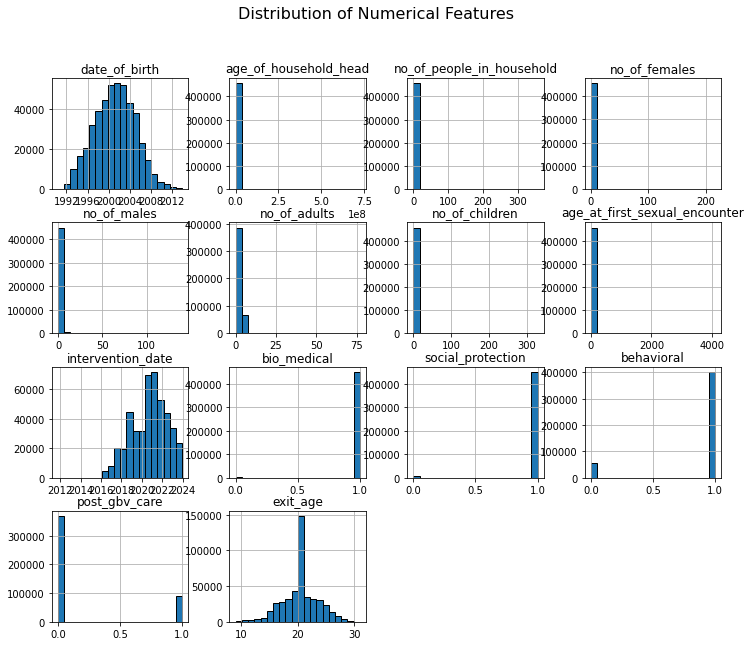

In [21]:
# Plot distribution of numerical features
data.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

- this identifies imbalanced categories and helps data encoding decisions.

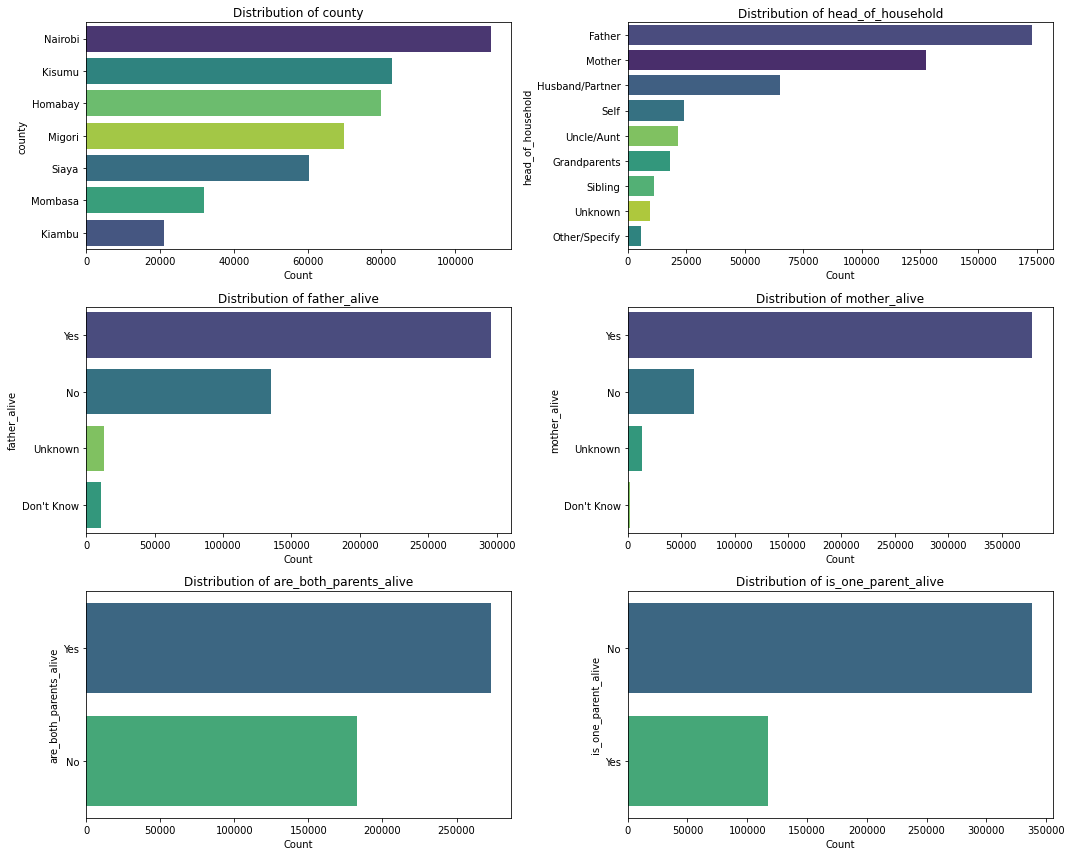

In [22]:
# Select categorical columns
categorical_features = data.select_dtypes(include=['object']).columns

# Plot bar charts for categorical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features[:6]):  # Limiting to first 6 to avoid clutter
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, hue=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

3. Correlation Analysis

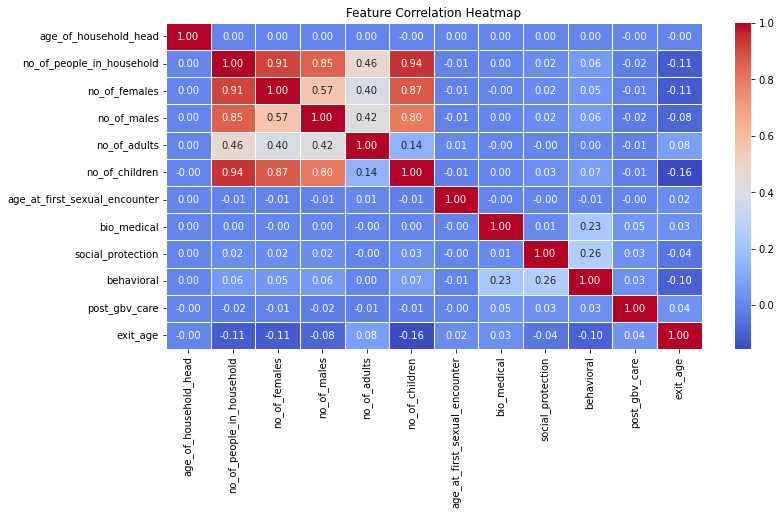

In [23]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute and plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Observations:**

*Strong positive Correlation*
- Number of people in the household and number of children (0.94): Households with more people tend to have more children.
- Number of females and number of people in the household (0.91): This suggests that larger households tend to have more female members.
- Number of males and number of people in the household (0.85): Similarly, larger households also have more male members.